In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
tdata=load_iris()
print(dir(tdata))
print(tdata.data[23])
print(tdata.target[23])
print(tdata.feature_names)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
[5.1 3.3 1.7 0.5]
0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
pl=[]
pw=[]
for i in tdata.data:
    pl.append(i[2])
    pw.append(i[3])
tdata=pd.DataFrame({"petal length (cm)":pl,"petal width (cm)":pw})
print(tdata.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


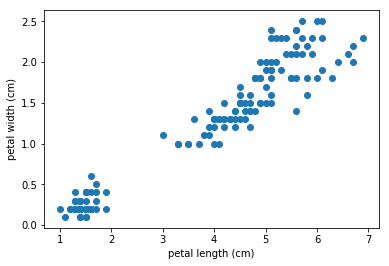

In [4]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(tdata["petal length (cm)"],tdata["petal width (cm)"])

In [5]:
sc=MinMaxScaler()
sc.fit(tdata[["petal width (cm)"]])
tdata["petal width (cm)"]=sc.transform(tdata[["petal width (cm)"]])
sc.fit(tdata[["petal length (cm)"]])
tdata["petal length (cm)"]=sc.transform(tdata[["petal length (cm)"]])
print(tdata.head())

   petal length (cm)  petal width (cm)
0           0.067797          0.041667
1           0.067797          0.041667
2           0.050847          0.041667
3           0.084746          0.041667
4           0.067797          0.041667


In [6]:
sse=[]
for i in range(1,25):
    mdl=KMeans(n_clusters=i)
    mdl.fit(tdata[["petal length (cm)","petal width (cm)"]])
    sse.append(mdl.inertia_)
print(sse)

[28.368353219727194, 5.176463590044367, 1.7018746881920965, 1.1588792731667126, 0.8535683225340073, 0.6801035704886196, 0.5651273455703979, 0.486178934934251, 0.4154845785171637, 0.36644820343915707, 0.3304359134562402, 0.3101252335461256, 0.2724784752929925, 0.25159131055436446, 0.24173192496209397, 0.21427916991717952, 0.19415362660002322, 0.18531311277629825, 0.17453055925564032, 0.15691356943010265, 0.15282582012754098, 0.13713170405599448, 0.13131829856375826, 0.12078566520518078]


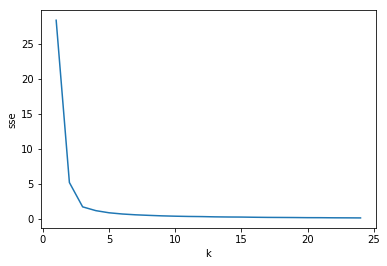

In [7]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(list(range(1,25)),sse)

In [8]:
model=KMeans(n_clusters=3)
print(model.fit_predict(tdata[["petal length (cm)","petal width (cm)"]]))
tdata["prediction"]=model.fit_predict(tdata[["petal length (cm)","petal width (cm)"]])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


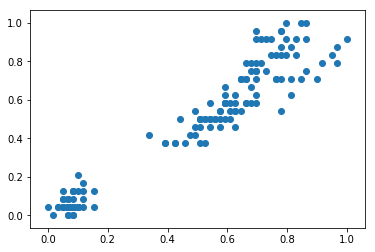

In [9]:
plt.scatter(tdata["petal length (cm)"],tdata["petal width (cm)"])
print(tdata)

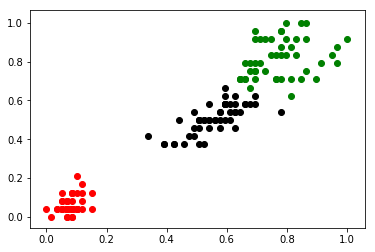

In [21]:
df1 = tdata[tdata.prediction==0]
df2 = tdata[tdata.prediction==1]
df3 = tdata[tdata.prediction==2]
plt.scatter(df1["petal length (cm)"],df1['petal width (cm)'],color='green')
plt.scatter(df2["petal length (cm)"],df2['petal width (cm)'],color='red')
plt.scatter(df3["petal length (cm)"],df3['petal width (cm)'],color='black')